In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

pixel_values, targets = data
targets = targets.astype(int)

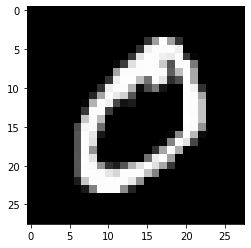

In [4]:
#Pixel values is 2- dimensional array of shape 70000*784, There area 70000 different images each of size 28 * 28 pixels 
#Flattening gives 784

single_image = pixel_values[1, :].reshape(28,28)

plt.imshow(single_image, cmap='gray')

In [5]:
tnse = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tnse.fit_transform(pixel_values[:3000, :])

In [6]:
tnse_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])),
                      columns=['x','y','targets']
    )
tnse_df.loc[:,"targets"] = tnse_df.targets.astype(int)

In [7]:
tnse_df

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9
...,...,...,...
2995,9.038110,58.850792,7
2996,-29.405334,-60.951775,0
2997,13.466378,47.369007,9
2998,-2.435752,7.983772,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


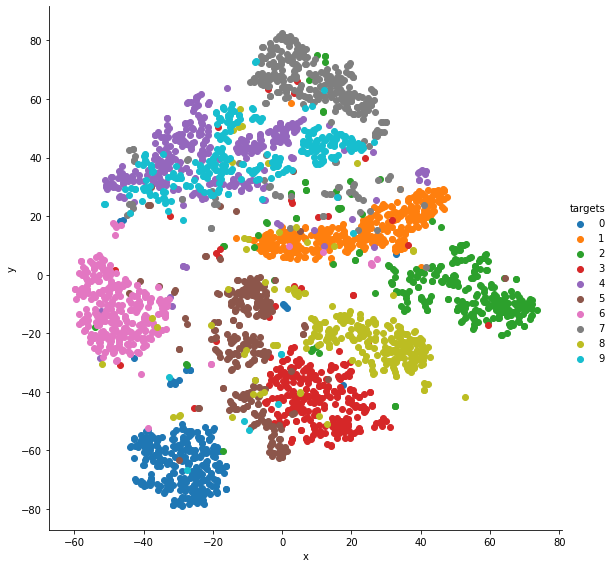

In [8]:
grid = sns.FacetGrid(tnse_df, hue="targets", size=8)

grid.map(plt.scatter, 'x','y').add_legend()

In [10]:
#This is one way of visualizing unsupervised datasets 
#we can also do k-means clustering on the same datasets and see how it performs in an unsupervised setting 

df = pd.read_csv("winequality_red.csv")

In [11]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# you can use the map function of the pandas with any dictionary to convert the values in a given column to values in the 
#dictionary
df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [13]:
#We are about splitting 
#use the sample with frac=1 to shuffle the dataframe
#we reset the indices since they change after shuffling the dataframe

df  = df.sample(frac=1).reset_index(drop=True)

In [14]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.380,0.48,2.6,0.073,22.0,84.0,0.99720,3.32,0.70,9.600000,1
1,6.6,0.895,0.04,2.3,0.068,7.0,13.0,0.99582,3.53,0.58,10.800000,3
2,9.0,0.450,0.49,2.6,0.084,21.0,75.0,0.99870,3.35,0.57,9.700000,2
3,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.700000,4
4,6.8,0.630,0.07,2.1,0.089,11.0,44.0,0.99530,3.47,0.55,10.400000,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,3
1595,7.3,0.305,0.39,1.2,0.059,7.0,11.0,0.99331,3.29,0.52,11.500000,3
1596,11.5,0.310,0.51,2.2,0.079,14.0,28.0,0.99820,3.03,0.93,9.800000,3
1597,10.3,0.320,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.600000,5


In [16]:
df_train = df.head(1000)

In [20]:
df_test = df.tail(599)

In [25]:
from sklearn import tree
from sklearn import metrics

#initialize decisionTreeClassifier class with max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=7)

#choose the columns you want to train on these are the features for the model
cols = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides' , 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol']
#train the model on the provided features and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
train_predictions =clf.predict(df_train[cols])

test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

test_accuracy= metrics.accuracy_score(df_test.quality, test_predictions)

In [27]:
print(train_accuracy, test_accuracy)

0.758 0.5792988313856428


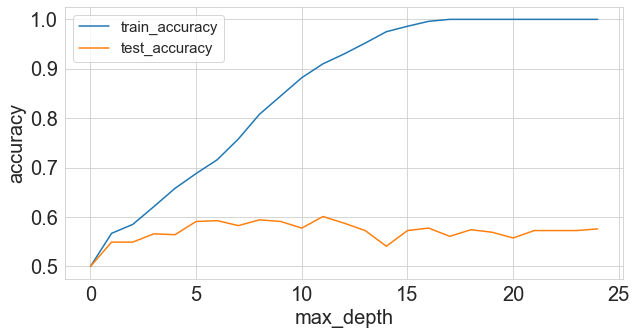

In [30]:
from sklearn import tree
from sklearn import metrics 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

%matplotlib inline

train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    cols = [
        'fixed acidity', 
        'volatile acidity',
        'citric acid',
        'residual sugar', 
        'chlorides' ,
        'free sulfur dioxide', 
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
    ]
    clf.fit(df_train[cols], df_train.quality)
    
    train_predictions = clf.predict(df_train[cols])
    
    test_predictions = clf.predict(df_test[cols])
    
    train_accuracy = metrics.accuracy_score(
            df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
            df_test.quality, test_predictions
    )
    
    #appending accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(range(0,26,5))
plt.xlabel('max_depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()